# Метод Рунге-Кутта

Метод Рунге-Кутта для численного решения задачи Коши на отрезке $[x_0, x_0 + l]$:<br><br> $$u'(x) = f(x, u(x))$$ $$u(x_0) = u_o$$
<br>Сначала реализуем метод Рунге-Кутта второго порядка точности. Результатом работы алгоритма будет являться сеточная функция $y(x_i)$, определенная на сетке $x_i = x_0 + ih$, где $i \in \{0, ..., n\}$, а $h$ - фиксированный шаг. В нашем случае сетка равномерная и равна $h = \frac{l}{n}$, где $n$ - число шагов, которое подается на вход алгоритму.<br><br>
Метод Рунге-Кутта второго порядка точности предоставляет нам рекуррентные формулы для вычисления значения сеточной функции $y_i$: $$y_{i+1} = y_i + \left[(1-\alpha)f(x_i, y_i) + \alpha f(x_i + \frac{h}{2\alpha}), y_i + \frac{h}{2\alpha} f(x_i, y_i))\right]h$$<br>
В приведенном ниже решении $\alpha = \frac{1}{2}$. В этом случае формулы принимают вид: $$y_{i+1} = y_i + \frac{h}{2} \left[f(x_i, y_i) + f(x_i + h, y_i + hf(x_i, y_i))\right]$$<br>

In [72]:
# Подключаем нужные библиотеки
import numpy as np
import math
import pandas as pd
import matplotlib as plt
%matplotlib inline

Метод принимает на вход начальные условия задачи Коши $x_0, u_0$, функцию $f(x, u)$, длину отрезка $l$ и число шагов $n$.

In [2]:
def Runge_Kutta_method(x_0, y_0, f, l, n):
    h = l / n # шаг сетки
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    grid[x_0] = y_0 # начальное условие
    for i in range(0, n): # заполняем оставшиеся n значений по рекуррентной формуле
        x_i = x_0 + h*i
        y_i = grid[x_i]
        t = f(x_i, y_i) # промежуточное вычисление
        grid[x_0 + h*(i + 1)] = y_i + (h / 2) * (t + f(x_i + h, y_i + h*t))
    return grid

Проверим работу реализованного метода на задаче Коши, данной в условии:$$f(x, y) = 3 - y - x$$ $$y(0) = 0$$<br>Точным (аналитическим) решением данной задачи является функция $y(x) = 4 - x - 4e^{-x}$.

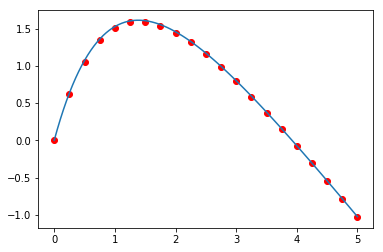

In [3]:
def func(x, y):
    return 3 - y - x

res = Runge_Kutta_method(0, 0, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 4 - true_solution - 4 * np.exp(-true_solution)) # график аналитического решения

Как видим, найденная сеточная функция достаточно хорошо приближает аналитическое решение на отрезке $[0, 5]$.

Проверим работу метода на некоторых других тестах. 

**Задача Коши 1**: $$y'(x) = y(x)$$ $$y(0) = 1$$Очевидно, что её решением является функция $y(x) = e^x$. Проверим это.

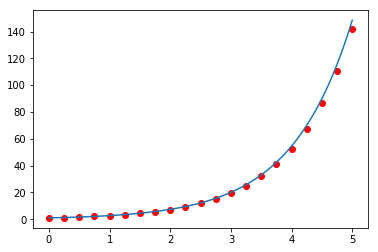

In [4]:
def func(x, y):
    return y

res = Runge_Kutta_method(0, 1, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(true_solution)) # график аналитического решения

**Задача Коши 2**: $$y'(x) = x^3+x+3\frac{y}{x}$$ $$y(1)=3$$При $x \geqslant 0$ её решением является функция $y(x) = x^4 - x^2 + 2x^3$. Проверим это. Увеличим число шагов $n$ до 50, чтобы повысить точность.

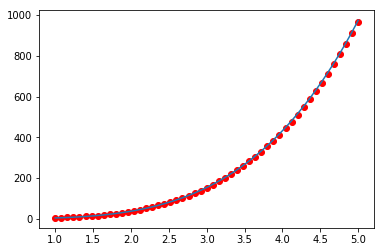

In [6]:
def func(x, y):
    return x * x * x + x + 3 * y / x

res = Runge_Kutta_method(1, 3, func, 4,  50) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.power(true_solution, 4) - np.power(true_solution, 2) + 3 * np.power(true_solution, 3))
# график аналитического решения

**Задача Коши 3**: $$y'(x) = -\frac{y}{x}$$ $$y(1)=1$$Аналитическим решением является функция $y=\frac{1}{x}$. Проверим работу алгоритма.

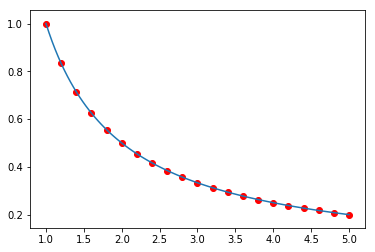

In [7]:
def func(x, y):
    return - y / x

res = Runge_Kutta_method(1, 1, func, 4,  20) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 1 / true_solution) # график аналитического решения

Второй порядок точности лучше, чем первый, однако практика показывает, что этой точности также недостаточно. Наиболее часто при проведении реальных расчетов используется схема Рунге-Кутта четвертого порядка точности. Метод определяется формулами$$\frac{y_{i+1} - y_i}{h} = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$где $$k_1 = f(x_i, y_i),\quad k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_1)$$ $$k_3 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_2), \quad k_4 = f(x_i + h, y_i + hk_3)$$Отсюда получаем рекуррентную формулу$$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k4)$$

In [10]:
def Runge_Kutta_method_fourth(x_0, y_0, f, l, n):
    h = l / n # шаг сетки
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    
    grid[x_0] = y_0 # начальное условие
    for i in range(0, n): # заполняем оставшиеся n значений по рекуррентной формуле
        x_i = x_0 + h*i
        y_i = grid[x_i]
        
        k1 = f(x_i, y_i)
        k2 = f(x_i + (h / 2), y_i + (h / 2) * k1)
        k3 = f(x_i + (h / 2), y_i + (h / 2) * k2)
        k4 = f(x_i + h, y_i + h * k3)
        
        grid[x_0 + h*(i + 1)] = y_i + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return grid

Проверим работу метода на тех же примерах, которые были выше.

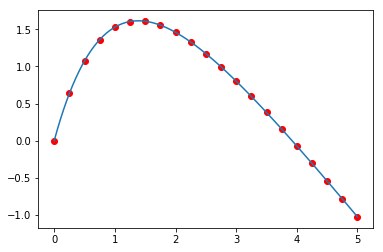

In [11]:
def func(x, y):
    return 3 - y - x

res = Runge_Kutta_method_fourth(0, 0, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 4 - true_solution - 4 * np.exp(-true_solution)) # график аналитического решения

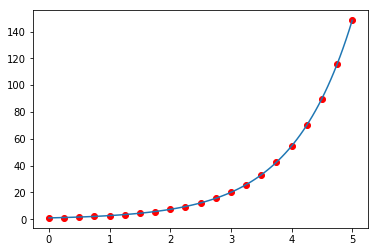

In [12]:
def func(x, y):
    return y

res = Runge_Kutta_method_fourth(0, 1, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(true_solution)) # график аналитического решения

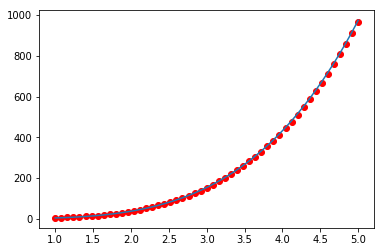

In [14]:
def func(x, y):
    return x * x * x + x + 3 * y / x

res = Runge_Kutta_method(1, 3, func, 4,  50) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.power(true_solution, 4) - np.power(true_solution, 2) + 3 * np.power(true_solution, 3))
# график аналитического решения

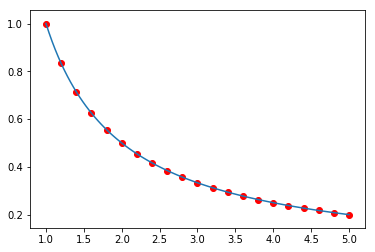

In [15]:
def func(x, y):
    return - y / x

res = Runge_Kutta_method(1, 1, func, 4,  20) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 1 / true_solution) # график аналитического решения

Как видим, метод работает корректно на данном наборе тестов. Если внимательно сравнить графики, то можно заметить повышение точности.

## Метод Рунге-Кутта для решения систем 

Рассмотрим задачу Коши для нормальной системы дифференциальных уравнений $$y_1'(x) = f_1(x, y_1(x), y_2(x), ..., y_n(x))$$ $$y_2(x) = f_2(x, y_1(x), y_2(x), ..., y_n(x))$$ $$.$$ $$.$$ $$.$$ $$y_n'(x) = f_n(x, y_1(x), y_2(x), ..., y_n(x))$$ $$ y_1(x_0) = y_{1, 0}$$  $$y_2(x_0) = y_{2, 0}$$ $$.$$ $$.$$ $$.$$  $$y_n(x_0) = y_{n, 0}$$

В данном случае метод Рунге-Кутта также применим, однако теперь считаем $\mathbf{y}, \mathbf{f}, \mathbf{k_i}$ векторами из $\mathbb{R}^n$, где $n$ - число функций в системе.<br>Формулы остаются прежними $$\frac{y_{i+1} - y_i}{h} = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$где $$k_1 = f(x_i, y_i),\quad k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_1)$$ $$k_3 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_2), \quad k_4 = f(x_i + h, y_i + hk_3)$$Отсюда получаем рекуррентную формулу$$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k4)$$

In [123]:
def Runge_Kutta_method_fourth_system(x_0, y_0, f, l, n):
    funcnum = y_0.shape[0]
    h = l / n # шаг сетки
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    grid[x_0] = y_0 # начальное условие
    for i in range(0, n): # заполняем оставшиеся n значений по рекуррентной формуле
        x_i = x_0 + h*i
        y_i = grid[x_i]
        
        k1 = np.empty(funcnum)
        k2 = np.empty(funcnum)
        k3 = np.empty(funcnum)
        k4 = np.empty(funcnum)
        
        for j in range(0, funcnum):
            k1[j] = f[j](x_i, y_i)
        
        for j in range(0, funcnum):
            k2[j] = f[j](x_i + (h / 2), y_i + (h / 2) * k1)
            
        for j in range(0, funcnum):
            k3[j] = f[j](x_i + (h / 2), y_i + (h / 2) * k2)
            
        for j in range(0, funcnum):
            k4[j] = f[j](x_i + h, y_i + h * k3)
        
        grid[x_0 + h*(i + 1)] = y_i + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return grid

Проверим работу программы на данной в условии системе $$x'(t) = 2.1y - x^2$$ $$y'(t) = e^{-x} + t + 2.1 y$$ $$x(0) = 1$$ $$y(0) = 0.25$$

In [125]:
def func1(x, vu):
    return 2.1 * vu[1] - vu[0] * vu[0]
def func2(x, vu):
    return math.exp(-vu[0]) + x + 2.1 * vu[1]

x_0 = 0
y_0 = np.array([1, 0.25])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 50)

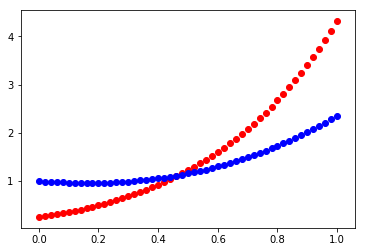

In [126]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

WolframAlpha не дает аналитического решения данной системы, так что проверим работу программы на других тестах.

**Пример 1.** $$y_1'(t) = -y_2(t)$$ $$y_2'(t) = y_1(t)$$ $$y_1(0) = 1$$ $$y_2(0) = 0$$Решением данной задачи Коши являются функции $$y_1(t) = \cos(t)$$ $$y_2(t) = \sin(t)$$

In [127]:
def func1(x, vu):
    return -vu[1]
def func2(x, vu):
    return vu[0]

x_0 = 0
y_0 = np.array([1, 0])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 3.14, 50)

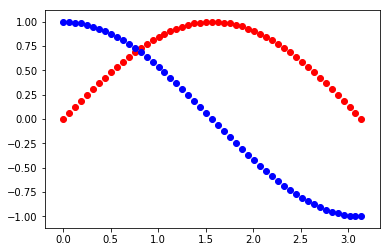

In [128]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

Из графика очевидно, что функции были найдены верно.

**Пример 2.** $$y_1'(t) = 2y_1 + 3y_2$$ $$y_2'(t) = 4y_1 - 2y_2$$ $$y_1(0) = 4$$ $$y_2(0) = 0$$Решением данной задачи Коши являются функции $$y_1(t) = 3e^{4t}+e^{-4t}$$ $$y_2(t) = 2e^{4t} - 2e^{-4t}$$

In [137]:
def func1(x, vu):
    return 2*vu[0] + 3*vu[1]
def func2(x, vu):
    return 4*vu[0] - 2*vu[1]

x_0 = 0
y_0 = np.array([4, 0])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 10)

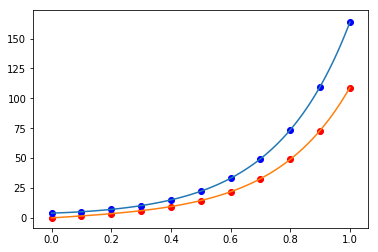

In [138]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

true_solution = np.linspace(0, 1, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 3*np.exp(4*true_solution) + np.exp(-4*true_solution)) # график y_1
true_solution = np.linspace(0, 1, 100) 
plt.pyplot.plot(true_solution, 2*np.exp(4*true_solution) - 2*np.exp(-4*true_solution)) # график y_2

Как видим, полученное решение очень точно приближает аналитическое.

**Пример 3.** $$y_1'(t) = 2$$ $$y_2'(t) = y_1$$ $$y_1(0) = 0$$ $$y_2(0) = 0$$Решением данной задачи Коши являются функции $$y_1(t) = 2t$$ $$y_2(t) = t^2$$

In [141]:
def func1(x, vu):
    return 2
def func2(x, vu):
    return vu[0]

x_0 = 0
y_0 = np.array([0, 0])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 20)

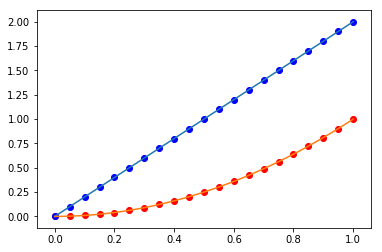

In [143]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

true_solution = np.linspace(0, 1, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 2*true_solution) # график y_1
true_solution = np.linspace(0, 1, 100) 
plt.pyplot.plot(true_solution, true_solution ** 2) # график y_2

**Пример 4.** $$x'=y$$ $$y'=x$$ $$x(0)=3$$ $$y(0)=1$$ Решением данной задачи Коши являются функции $=x(t)=e^{-t} + 2e^t$, $y(t)=2e^t-e^{-t}$

In [145]:
def func1(x, vu):
    return vu[1]
def func2(x, vu):
    return vu[0]

x_0 = 0
y_0 = np.array([3, 1])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 20)

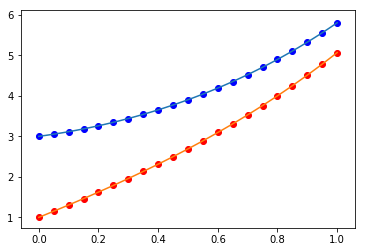

In [146]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

true_solution = np.linspace(0, 1, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(-true_solution) + 2*np.exp(true_solution)) # график y_1
true_solution = np.linspace(0, 1, 100) 
plt.pyplot.plot(true_solution, 2*np.exp(true_solution) - np.exp(-true_solution)) # график y_2

Как видим, и с этой задачей численный метод справился с достаточной точностью.